In [1]:
import pandas as pd
import matplotlib.pyplot as axes
import numpy as np
from matplotlib.pyplot import figure, xticks

import json
import glob
import argparse
import numpy as np
from tabulate import tabulate

# import pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt


# plt.style.use('ggplot')

pd.set_option('display.max_colwidth', None)
matplotlib.rcParams.update({'font.size': 14})
from icecream import ic

In [2]:
# df_1 = pd.read_csv(r"./data/seed24032022-valid.csv")
# df_2 = pd.read_csv(r"./data/seed42-valid.csv")
# df_3 = pd.read_csv(r"./data/seed26092020-valid.csv")

df_1 = pd.read_csv(r"./data/seed24032022-test.csv")
df_2 = pd.read_csv(r"./data/seed42-test.csv")
df_3 = pd.read_csv(r"./data/seed26092020-test.csv")

# df_1 = pd.read_csv(r"./data/seed24032022-train.csv")
# df_2 = pd.read_csv(r"./data/seed42-train.csv")
# df_3 = pd.read_csv(r"./data/seed26092020-train.csv")

In [3]:
df_comb = (pd.concat([df_1, df_2, df_3]).groupby(
    'filename', as_index=False).agg({
        'model_target':'first', 
        'downstream_task':'first',
        'perturbation_technique':'first',
        'codemix_lang':'first',
        'perturb_ratio':'first',
        'before_attack_acc':['mean', 'std'],
        'after_attack_acc':['mean', 'std'],
        'delta_acc':['mean', 'std'],
        'avg_semantic_sim':['mean', 'std'],
        'avg_running_time(s)':'mean'

        }
    )
)

In [5]:
# df_comb[df_comb["downstream_task"] == "sentiment"].head()

In [6]:
df_comb.to_csv("test_compiled.csv", index=False)
df_comb = pd.read_csv("test_compiled.csv")

In [7]:
df_comb = df_comb.iloc[1: , :]
# df_comb.head()

In [8]:
df_comb.columns = [
    'filename', 'model_target', 'downstream_task', 'perturbation_technique',
    'codemix_lang', 'perturb_ratio', 'before_attack_acc_mean',
    'before_attack_acc_std', 'after_attack_acc_mean', 'after_attack_acc_std',
    'delta_acc_mean', 'delta_acc_std', 'avg_semantic_sim_mean', 'avg_semantic_sim_std',
    'avg_running_time(s)'
]

numcols = [
    'before_attack_acc_mean', 'before_attack_acc_std', 'after_attack_acc_mean', 'after_attack_acc_std',
    'delta_acc_mean', 'delta_acc_std', 'avg_semantic_sim_mean', 'avg_semantic_sim_std'
    ]

# df_comb[numcols] = df_comb[numcols]
df_comb[numcols] = df_comb[numcols].apply(pd.to_numeric, errors='coerce')
df_comb[numcols] = df_comb[numcols].apply(lambda x: x*100)
# df_comb['before_attack_acc_mean'] = df_comb['before_attack_acc_mean']*100
df_comb.head()

,filename,model_target,downstream_task,perturbation_technique,codemix_lang,perturb_ratio,before_attack_acc_mean,before_attack_acc_std,after_attack_acc_mean,after_attack_acc_std,delta_acc_mean,delta_acc_std,avg_semantic_sim_mean,avg_semantic_sim_std,avg_running_time(s)
1,indobert-emotion-codemixing-en-adv-0.2-test.csv,indobert,emotion,codemixing,en,0.2,72.424242,0.860441,63.030303,1.478729,9.393939,0.918512,95.157810,0.026055,0.4362490151515151
2,indobert-emotion-codemixing-en-adv-0.4-test.csv,indobert,emotion,codemixing,en,0.4,72.424242,0.860441,62.878788,2.276512,9.545455,1.638887,94.449744,0.059839,0.42876431818181815
3,indobert-emotion-codemixing-en-adv-0.6-test.csv,indobert,emotion,codemixing,en,0.6,72.424242,0.860441,62.651515,2.160087,9.772727,1.590909,93.604016,0.104744,0.24182340909090905
4,indobert-emotion-codemixing-en-adv-0.8-test.csv,indobert,emotion,codemixing,en,0.8,72.424242,0.860441,62.348485,2.049659,10.075758,1.513256,92.844508,0.067485,0.24619196969696966
5,indobert-emotion-codemixing-fr-adv-0.2-test.csv,indobert,emotion,codemixing,fr,0.2,72.424242,0.860441,62.045455,1.775057,10.378788,1.705808,94.783456,0.015703,0.44779825757575753


In [9]:
df_comb.to_csv("test_compiled.csv", index=False)
df_comb = pd.read_csv("test_compiled.csv")

In [10]:
df_comb = df_comb[df_comb["codemix_lang"].isin(["en", "fr", "it", "ms", "jw", "su"])]

df_comb.codemix_lang.unique()

array(['en', 'fr', 'it', 'jw', 'ms', 'su'], dtype=object)

In [11]:

df_task = df_comb[df_comb["downstream_task"] == "sentiment"].drop("filename", axis=1)

df_task = pd.pivot_table(data=df_task, 
                        index=['model_target', "perturb_ratio"], 
                        values=['before_attack_acc_mean', 'before_attack_acc_std', 'after_attack_acc_mean', 'after_attack_acc_std'],
                        aggfunc='mean')

df_task = pd.DataFrame(df_task.to_records())
df_task

,model_target,perturb_ratio,after_attack_acc_mean,after_attack_acc_std,before_attack_acc_mean,before_attack_acc_std
0,indobert,0.2,88.533333,0.321688,91.000000,0.000000
1,indobert,0.4,88.077778,0.462037,91.000000,0.000000
2,indobert,0.6,87.777778,0.531619,91.000000,0.000000
3,indobert,0.8,87.388889,0.593175,91.000000,0.000000
4,indobertlarge,0.2,91.311111,0.912654,94.200000,0.529150
5,indobertlarge,0.4,90.966667,0.913091,94.200000,0.529150
6,indobertlarge,0.6,90.666667,0.901704,94.200000,0.529150
7,indobertlarge,0.8,90.611111,0.877554,94.200000,0.529150
8,mbert,0.2,79.022222,0.682961,83.000000,0.600000
9,mbert,0.4,78.711111,0.782974,83.000000,0.600000


# Plot Accuracy vs Perturbation By Language

6 Bahasa = 6 Figures
Tiap figures punya 4 linechart untuk tiap model

### Sentiment - English

<ipython-input-12-d5b482a3f106>:73: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(vals_mean.keys(), vals_mean.values(), '-o', label='{}'.format(model_map[model]), linestyle='--', color=color_map[model])


<Figure size 432x288 with 0 Axes>

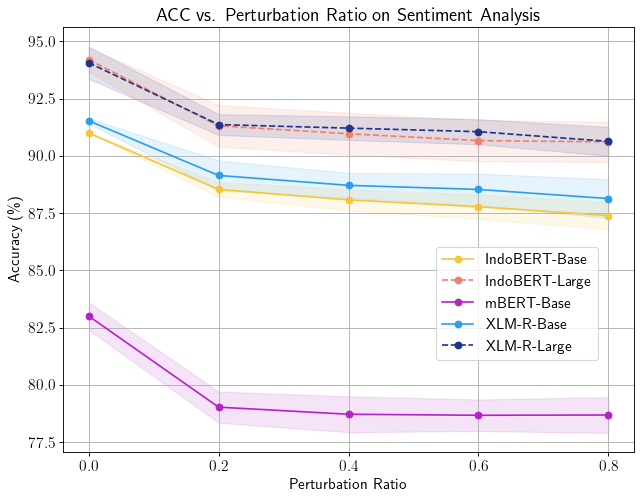

<ipython-input-12-d5b482a3f106>:73: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(vals_mean.keys(), vals_mean.values(), '-o', label='{}'.format(model_map[model]), linestyle='--', color=color_map[model])


<Figure size 432x288 with 0 Axes>

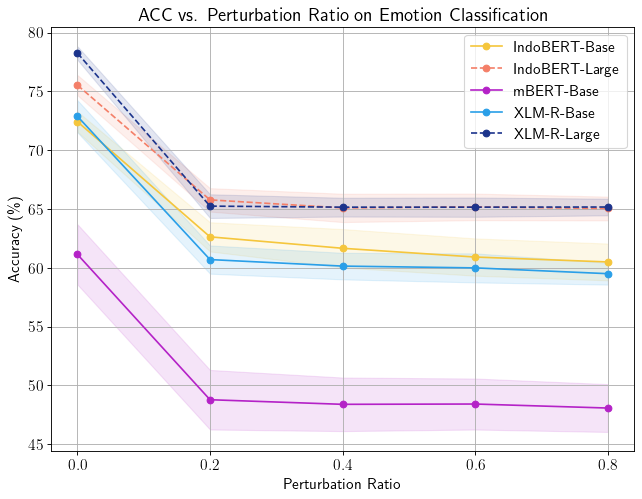

In [12]:

# plt.style.use('ggplot')

def visualize_1(task, df=df_comb):   
    plt.clf()
    lang_map = {
        "en": "English",
        'fr': "French", 
        'id': "Synonym Replaced", 
        'it': "Italian", 
        'jw': "Javanese", 
        'ms': "Malay", 
        'su': "Sundanese"
    }

    color_map = {
        'indobert': "#f5c63c", 
        'indobertlarge': "#f47f68", 
        'xlmrlarge': "#1c348c",
        'mbert': "#b422c7", 
        'xlmr': "#2a9fe8"
    }

    model_map = {
        'indobert': "IndoBERT-Base", 
        'indobertlarge': "IndoBERT-Large", 
        'xlmrlarge': "XLM-R-Large",
        'mbert': "mBERT-Base", 
        'xlmr': "XLM-R-Base"
    }

    task_map = {
        "emotion": "Emotion Classification",
        "sentiment": "Sentiment Analysis"
    }


    df_task = df_comb[df_comb["downstream_task"] == task].drop("filename", axis=1)

    df_task = pd.pivot_table(data=df_task, 
                            index=['model_target', "perturb_ratio"], 
                            values=['before_attack_acc_mean', 'before_attack_acc_std', 'after_attack_acc_mean', 'after_attack_acc_std'],
                            aggfunc='mean')

                            
    df_task = pd.DataFrame(df_task.to_records())

    percent_pert = [0, 0.2, 0.4, 0.6, 0.8]
    list_model = df_task.model_target.unique()
    
    figure(num=None, figsize=(8, 6), dpi=80)

    plt.ticklabel_format(style = 'plain')
    for model in list_model:
        acc_arr_mean = df_task[(df_task["model_target"] == model)].after_attack_acc_mean.values
        acc_arr_std = df_task[(df_task["model_target"] == model)].after_attack_acc_std.values
        before_attack_acc_mean = df_task[(df_task["model_target"] == model)].before_attack_acc_mean.values[0]
        before_attack_acc_std = df_task[(df_task["model_target"] == model)].before_attack_acc_std.values[0]

        acc_arr_mean = np.insert(acc_arr_mean, 0, before_attack_acc_mean, axis=0)
        acc_arr_std = np.insert(acc_arr_std, 0, before_attack_acc_std, axis=0)
        acc_arr_min = acc_arr_mean - acc_arr_std
        acc_arr_max = acc_arr_mean + acc_arr_std

        acc_arr_mean = np.array(acc_arr_mean, dtype=float)
        acc_arr_min = np.array(acc_arr_min, dtype=float)
        acc_arr_max = np.array(acc_arr_max, dtype=float)
        
        vals_mean = dict(zip(percent_pert, acc_arr_mean))
        vals_min = dict(zip(percent_pert, acc_arr_min))
        vals_max = dict(zip(percent_pert, acc_arr_max))
        plt.grid(True)
        if "large" in model:
            plt.plot(vals_mean.keys(), vals_mean.values(), '-o', label='{}'.format(model_map[model]), linestyle='--', color=color_map[model])
            plt.fill_between(percent_pert, acc_arr_min, acc_arr_max, color=color_map[model], interpolate=True, alpha=0.12)
        else:
            plt.plot(vals_mean.keys(), vals_mean.values(), '-o', label='{}'.format(model_map[model]), color=color_map[model])
            plt.fill_between(percent_pert, acc_arr_min, acc_arr_max, color=color_map[model], interpolate=True, alpha=0.12)
            
    
    plt.xticks(percent_pert)
    # plt.xticklabels(percent_pert)

    plt.tight_layout()
    if task == "sentiment":
        plt.legend(loc="center right", bbox_to_anchor=(0.95,0.35))
    elif task == "emotion":
        plt.legend(loc="upper right")
    plt.xlabel('Perturbation Ratio')
    plt.ylabel('Accuracy (\%)')
    title = 'ACC vs. Perturbation Ratio on {}'.format(task_map[task])
    plt.title(title)
    
    
    plt.savefig('viz/'+str(task)+'.png',bbox_inches='tight',pad_inches = 0, dpi=1200)
    plt.show()


visualize_1("sentiment")
visualize_1("emotion")

In [ ]:
% % CHART 1
% ngebandingin 2 jenis language family indo-european vs austronesian.
% ambil model xlmr large (model terbaik)
% satu language family 1 warna, beda line style
% family lain pake beda warna
% 1 sentiment 1 emotion

% CHART 2
% perbandingan kenaikan perturbation ratio vs acc, ditambah std

% CHART 3
% nunjukkin seberapa jauh improvement dari sebelum dan sesudah ditrain, 
% perturbed test
% 

In [43]:
df_comb[(df_comb["model_target"] == "xlmrlarge") & (df_comb["downstream_task"] == "sentiment")]
# df_comb

df_austro = df_comb[(df_comb["model_target"] == "xlmrlarge") & (df_comb["downstream_task"] == "sentiment") & (df_comb["codemix_lang"].isin(["ms", "su", "jw"]))]
# df_austro

df_euro = df_comb[(df_comb["model_target"] == "xlmrlarge") & (df_comb["downstream_task"] == "sentiment") & ~(df_comb["codemix_lang"].isin(["ms", "su", "jw", "id"]))]
# df_euro

In [13]:
df_task = df_comb[(df_comb["downstream_task"] == "sentiment") & (df_comb["model_target"] == 'xlmrlarge')].drop("filename", axis=1)

df_task = pd.pivot_table(data=df_task, 
                        index=['model_target', "codemix_lang", "perturb_ratio"], 
                        values=['before_attack_acc_mean', 'before_attack_acc_std', 'after_attack_acc_mean', 'after_attack_acc_std'],
                        aggfunc='mean')

# df_task = pd.DataFrame(df_task.to_records())

# df_task["codemix_lang"].unique()
# df_task = df_task.groupby("codemix_lang")
df_task

after_attack_acc_mean  \
model_target codemix_lang perturb_ratio                          
xlmrlarge    en           0.2                        91.800000   
                          0.4                        91.866667   
                          0.6                        92.000000   
                          0.8                        92.000000   
             fr           0.2                        91.133333   
                          0.4                        90.733333   
                          0.6                        90.600000   
                          0.8                        89.800000   
             it           0.2                        90.933333   
                          0.4                        91.066667   
                          0.6                        90.666667   
                          0.8                        90.400000   
             jw           0.2                        91.400000   
                          0.4                        91.133333   
                          0.6                        91.000000   
                          0.8                        90.200000   
             ms           0.2                        91.666667   
                          0.4                        91.600000   
                          0.6                        91.400000   
                          0.8                        91.200000   
             su           0.2                        91.266667   
                          0.4                        90.866667   
                          0.6                        90.666667   
                          0.8                        90.200000   

                                         after_attack_acc_std  \
model_target codemix_lang perturb_ratio                         
xlmrlarge    en           0.2                        0.346410   
                          0.4                        0.305505   
                          0.6                        0.346410   
                          0.8                        0.529150   
             fr           0.2                        0.416333   
                          0.4                        0.611010   
                          0.6                        1.216553   
                          0.8                        1.400000   
             it           0.2                        0.230940   
                          0.4                        0.305505   
                          0.6                        0.305505   
                          0.8                        0.400000   
             jw           0.2                        0.916515   
                          0.4                        0.923760   
                          0.6                        0.721110   
                          0.8                        0.721110   
             ms           0.2                        0.503322   
                          0.4                        0.529150   
                          0.6                        0.400000   
                          0.8                        0.529150   
             su           0.2                        0.305505   
                          0.4                        0.416333   
                          0.6                        0.305505   
                          0.8                        0.200000   

                                         before_attack_acc_mean  \
model_target codemix_lang perturb_ratio                           
xlmrlarge    en           0.2                         94.066667   
                          0.4                         94.066667   
                          0.6                         94.066667   
                          0.8                         94.066667   
             fr           0.2                         94.066667   
                          0.4                         94.066667   
                          0.6                         94.066667   
                          0.8 

<Figure size 432x288 with 0 Axes>

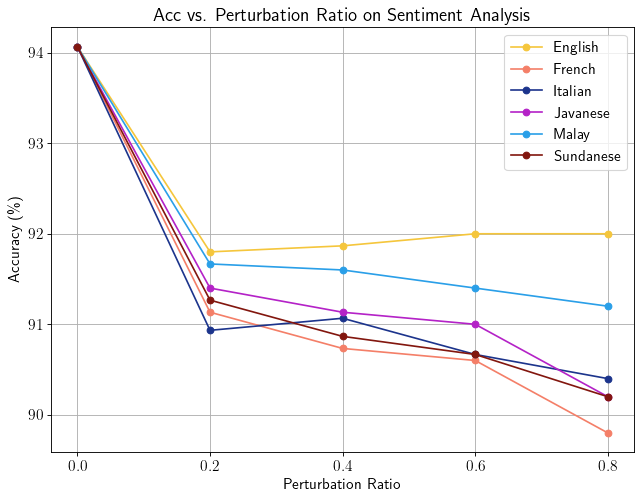

<Figure size 432x288 with 0 Axes>

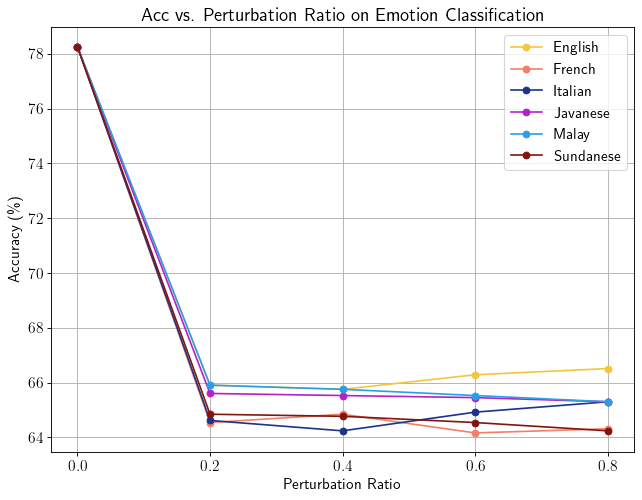

In [16]:

# plt.style.use('ggplot')

def visualize_2(task, df=df_comb):   
    plt.clf()
    lang_map = {
        "en": "English",
        'fr': "French", 
        'it': "Italian", 
        'jw': "Javanese", 
        'ms': "Malay", 
        'su': "Sundanese"
    }


    lang_map = {
        "en": "English",
        'fr': "French", 
        'it': "Italian", 
        'jw': "Javanese", 
        'ms': "Malay", 
        'su': "Sundanese"
    }

    color_map = {
        'en': "#f5c63c", 
        'fr': "#f47f68", 
        'it': "#1c348c",
        'jw': "#b422c7", 
        'ms': "#2a9fe8",
        "su": '#82160e'
    }

    model_map = {
        'indobert': "IndoBERT-Base", 
        'indobertlarge': "IndoBERT-Large", 
        'xlmrlarge': "XLM-R-Large",
        'mbert': "mBERT-Base", 
        'xlmr': "XLM-R-Base"
    }

    task_map = {
        "emotion": "Emotion Classification",
        "sentiment": "Sentiment Analysis"
    }


    df_task = df_comb[(df_comb["downstream_task"] == task) & (df_comb["model_target"] == 'xlmrlarge')].drop("filename", axis=1)

    df_task = pd.pivot_table(data=df_task, 
                            index=['model_target', "codemix_lang", "perturb_ratio"], 
                            values=['before_attack_acc_mean', 'before_attack_acc_std', 'after_attack_acc_mean', 'after_attack_acc_std'],
                            aggfunc='mean')

                            
    df_task = pd.DataFrame(df_task.to_records())


    percent_pert = [0, 0.2, 0.4, 0.6, 0.8]
    # list_model = df_task.model_target.unique()
    
    figure(num=None, figsize=(8, 6), dpi=80)

    plt.ticklabel_format(style = 'plain')
    for lang in lang_map:
        acc_arr_mean = df_task[(df_task["codemix_lang"] == lang)].after_attack_acc_mean.values
        acc_arr_std = df_task[(df_task["codemix_lang"] == lang)].after_attack_acc_std.values
        before_attack_acc_mean = df_task[(df_task["codemix_lang"] == lang)].before_attack_acc_mean.values[0]
        before_attack_acc_std = df_task[(df_task["codemix_lang"] == lang)].before_attack_acc_std.values[0]

        acc_arr_mean = np.insert(acc_arr_mean, 0, before_attack_acc_mean, axis=0)
        acc_arr_std = np.insert(acc_arr_std, 0, before_attack_acc_std, axis=0)
        acc_arr_min = acc_arr_mean - acc_arr_std
        acc_arr_max = acc_arr_mean + acc_arr_std

        acc_arr_mean = np.array(acc_arr_mean, dtype=float)
        acc_arr_min = np.array(acc_arr_min, dtype=float)
        acc_arr_max = np.array(acc_arr_max, dtype=float)
        
        vals_mean = dict(zip(percent_pert, acc_arr_mean))
        vals_min = dict(zip(percent_pert, acc_arr_min))
        vals_max = dict(zip(percent_pert, acc_arr_max))
        plt.grid(True)

        # if lang in ['en', 'fr', 'it']:
        #     plt.plot(vals_mean.keys(), vals_mean.values(), '-o', label='{}'.format(lang_map[lang]), linestyle='--', color="#1c348c")
        #     plt.fill_between(percent_pert, acc_arr_min, acc_arr_max, color="#1c348c", interpolate=True, alpha=0.12)
        # else:
        plt.plot(vals_mean.keys(), vals_mean.values(), '-o', label='{}'.format(lang_map[lang]), color=color_map[lang])
        # plt.fill_between(percent_pert, acc_arr_min, acc_arr_max, color=color_map[lang], interpolate=True, alpha=0.12)
            
    
    plt.xticks(percent_pert)
    # plt.xticklabels(percent_pert)

    plt.tight_layout()
    plt.legend(loc="upper right")
    # if task == "sentiment":
    #     plt.legend(loc="center right", bbox_to_anchor=(0.95,0.35))
    # elif task == "emotion":
    #     plt.legend(loc="upper right")
    plt.xlabel('Perturbation Ratio')
    plt.ylabel('Accuracy (\%)')
    title = 'Acc vs. Perturbation Ratio on {}'.format(task_map[task])
    plt.title(title)
    
    
    plt.savefig('viz/chart_2/'+str(task)+'.png',bbox_inches='tight',pad_inches = 0, dpi=1200)
    plt.show()


visualize_2("sentiment")
visualize_2("emotion")

In [ ]:
# plt.style.use('ggplot')

def visualize_3(lang, task, df=df_comb):   
    lang_map = {
        "en": "English",
        'fr': "French", 
        'id': "Synonym Replaced", 
        'it': "Italian", 
        'jw': "Javanese", 
        'ms': "Malay", 
        'su': "Sundanese"
    }

    color_map = {
        'indobert': "#f5c63c", 
        'indobertlarge': "#f47f68", 
        "xlmrlarge": "#b422c7",
        'mbert': "#1c348c", 
        'xlmr': "#2a9fe8"
    }

    task_map = {
        "emotion": "Emotion Classification",
        "sentiment": "Sentiment Analysis"
    }


    df_lang = df[(df["codemix_lang"] == lang) & (df["downstream_task"] == task)]

    percent_pert = [0, 0.2, 0.4, 0.6, 0.8]
    list_model = df_lang.model_target.unique()
    
    figure(num=None, figsize=(8, 6), dpi=80)


    for model in list_model:
        acc_arr = df_lang[(df_lang["model_target"] == model)].after_attack_acc.values
        before_attack_acc_arr = df_lang[(df_lang["model_target"] == model)].before_attack_acc.values[0]
        acc_arr = np.insert(acc_arr, 0, before_attack_acc_arr, axis=0)
        semantic_sim_arr = df_lang[(df_lang["model_target"] == model)].avg_semantic_sim.values
        semantic_sim_arr = np.insert(semantic_sim_arr, 0, 1, axis=0)

        # for i, v in enumerate(acc_arr):
        #     plt.annotate(str(format(float(v),".2f")), xy=(semantic_sim_arr[i],v), textcoords='offset points', xytext=(5, 5))
        
        
        if "large" in model:
            plt.plot(semantic_sim_arr, acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
        else:
            plt.plot(semantic_sim_arr, acc_arr, '-o', label='{}'.format(model), color=color_map[model])
        # plt.plot(semantic_sim_arr, acc_arr, '-o', label='{}'.format(model), color=color_map[model])
    
    plt.legend(loc="lower left")
    plt.xlabel('Semantic Similarity')
    plt.ylabel('Accuracy Score')
    title = 'Indonesian-{} {}'.format(lang_map[lang], task_map[task])
    plt.title(title)
    
    # plt.savefig('plot.png')
    
    plt.savefig('viz/rq2/'+str(task)+'/'+str(title)+'.png',bbox_inches='tight',pad_inches = 0)
    plt.show()

# lang_list = ['en', 'fr', 'id', 'it', 'jw', 'ms', 'su']
# for i in lang_list:
task = "sentiment"
visualize_2("en", task)
visualize_2("fr", task)
visualize_2("id", task)
visualize_2("it", task)
visualize_2("jw", task)
visualize_2("ms", task)
visualize_2("su", task)

<ipython-input-8-096469c08e97>:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
<ipython-input-8-096469c08e97>:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])


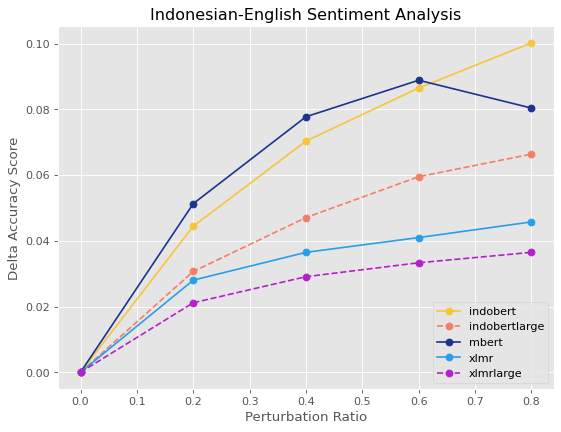

<ipython-input-8-096469c08e97>:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
<ipython-input-8-096469c08e97>:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])


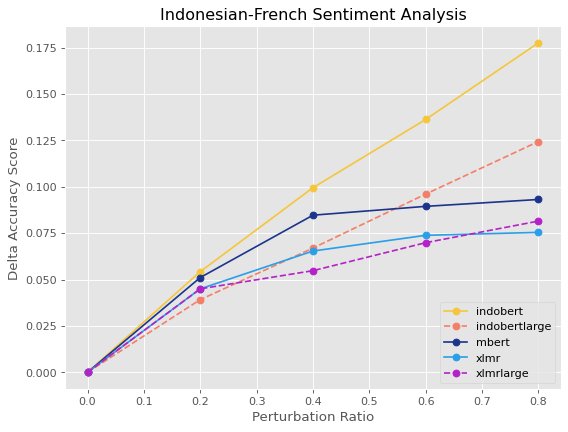

<ipython-input-8-096469c08e97>:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
<ipython-input-8-096469c08e97>:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])


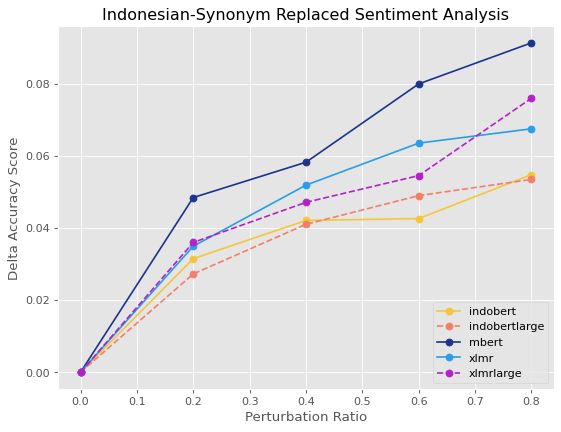

<ipython-input-8-096469c08e97>:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
<ipython-input-8-096469c08e97>:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])


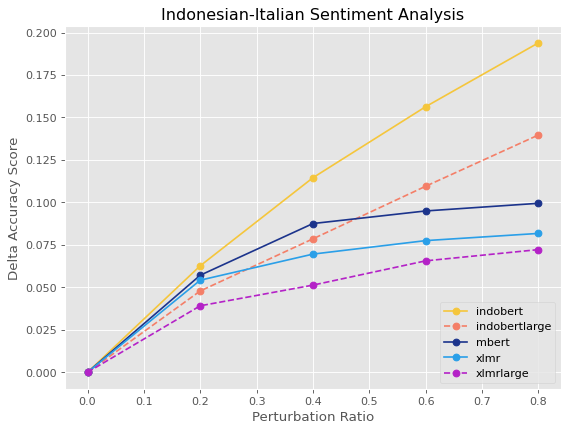

<ipython-input-8-096469c08e97>:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
<ipython-input-8-096469c08e97>:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])


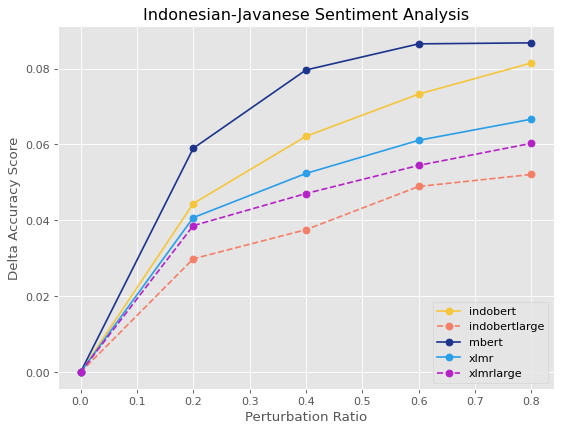

<ipython-input-8-096469c08e97>:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
<ipython-input-8-096469c08e97>:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])


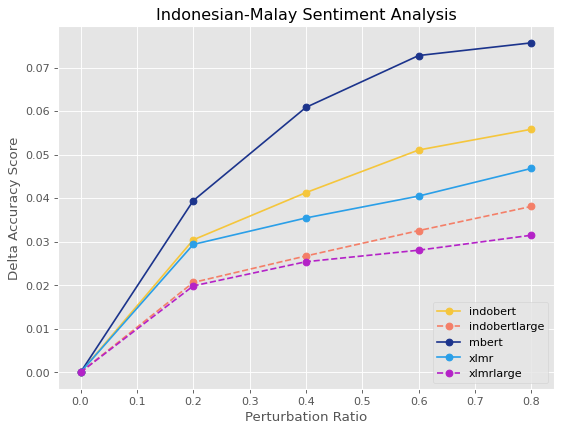

<ipython-input-8-096469c08e97>:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
<ipython-input-8-096469c08e97>:46: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])


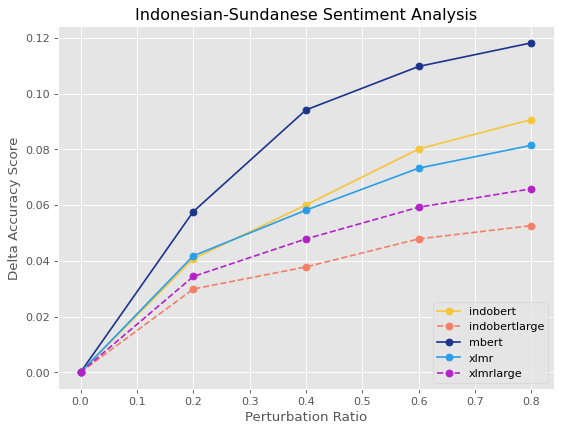

In [8]:
def visualize_3(lang, task, df=df_comb):   
    lang_map = {
        "en": "English",
        'fr': "French", 
        'id': "Synonym Replaced", 
        'it': "Italian", 
        'jw': "Javanese", 
        'ms': "Malay", 
        'su': "Sundanese"
    }

    color_map = {
        'indobert': "#f5c63c", 
        'indobertlarge': "#f47f68", 
        "xlmrlarge": "#b422c7",
        'mbert': "#1c348c", 
        'xlmr': "#2a9fe8"
    }

    task_map = {
        "emotion": "Emotion Classification",
        "sentiment": "Sentiment Analysis"
    }

    # df_lang = df[(df["codemix_lang"] == "en") & (df["downstream_task"] == "emotion")]
    # acc_arr = df_lang[(df_lang["model_target"] == "indobert")].after_attack_acc.values

    df_lang = df[(df["codemix_lang"] == lang) & (df["downstream_task"] == task)]
    # semantic_sim_arr

    percent_pert = [0, 0.2, 0.4, 0.6, 0.8]
    list_model = df_lang.model_target.unique()
    figure(num=None, figsize=(8, 6), dpi=80)


    for model in list_model:
        delta_acc_arr = df_lang[(df_lang["model_target"] == model)].delta_acc.values
        # before_attack_acc_arr = df_lang[(df_lang["model_target"] == model)].before_attack_acc.values[0]
        delta_acc_arr = np.insert(delta_acc_arr, 0, 0, axis=0)
        # semantic_sim_arr = df_lang[(df_lang["model_target"] == model)].avg_semantic_sim.values
        # semantic_sim_arr = np.insert(semantic_sim_arr, 0, 1, axis=0)
        
        # for i, v in enumerate(delta_acc_arr):
        #     plt.annotate(str(format(float(v),".2f")), xy=(percent_pert[i],v), textcoords='offset points', xytext=(5, 5))
        if "large" in model:
            plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), linestyle='--', color=color_map[model])
        else:
            plt.plot(percent_pert, delta_acc_arr, '-o', label='{}'.format(model), color=color_map[model])
        
    plt.legend(loc="lower right")
    plt.xlabel('Perturbation Ratio')
    plt.ylabel('Delta Accuracy Score')
    title = 'Indonesian-{} {}'.format(lang_map[lang], task_map[task])
    plt.title(title)
    
    # plt.savefig('plot.png')
    
    plt.savefig('viz/rq3/'+str(task)+'/'+str(title)+'.png',bbox_inches='tight',pad_inches = 0)
    plt.show()

# lang_list = ['en', 'fr', 'id', 'it', 'jw', 'ms', 'su']
# for i in lang_list:
task = "sentiment"
visualize_3("en", task)
visualize_3("fr", task)
visualize_3("id", task)
visualize_3("it", task)
visualize_3("jw", task)
visualize_3("ms", task)
visualize_3("su", task)

In [9]:
def find_mean_delta(task, df=df_comb):
    # df_lang = df[(df["codemix_lang"] == lang) & (df["downstream_task"] == task)]
    # semantic_sim_arr

    percent_pert = [0, 0.2, 0.4, 0.6, 0.8]
    list_model = df.model_target.unique()
    langs = df.codemix_lang.unique()
    # figure(num=None, figsize=(8, 6), dpi=80)
    # print(lang)
    means = {}
    # print(task)
    for lang in langs:
        df_lang = df[(df["codemix_lang"] == lang) & (df["downstream_task"] == task)]
        print(lang)
        for model in list_model:
            delta_acc_arr = df_lang[(df_lang["model_target"] == model)].delta_acc.values
            # before_attack_acc_arr = df_lang[(df_lang["model_target"] == model)].before_attack_acc.values[0]
            delta_acc_arr = np.insert(delta_acc_arr, 0, 0, axis=0)
            print("{:.2f}".format(np.mean(delta_acc_arr)*100))
            means["model"] = model
            means[lang] = "{:.2f}".format(np.mean(delta_acc_arr)*100)
            # print(means)
        # display(means)
        print()
    return pd.DataFrame([means])

task = "emotion"
find_mean_delta(task)

en
14.36
10.85
11.67
8.98
10.35

fr
21.29
20.18
13.98
13.44
14.97

it
19.82
19.39
14.39
14.21
15.32

jw
16.70
15.74
17.09
14.20
15.82

ms
8.44
7.35
9.95
8.35
11.12

su
16.42
14.44
13.94
14.89
15.98

id
9.03
9.20
12.61
11.91
13.08



,model,en,fr,it,jw,ms,su,id
0,xlmrlarge,10.35,14.97,15.32,15.82,11.12,15.98,13.08


In [10]:
def find_mean_semantic(task, df=df_comb):
    percent_pert = [0, 0.2, 0.4, 0.6, 0.8]
    list_model = df.model_target.unique()
    langs = df.codemix_lang.unique()
    # figure(num=None, figsize=(8, 6), dpi=80)
    # print(lang)
    means = {}
    # print(task)
    for lang in langs:
        df_lang = df[(df["codemix_lang"] == lang) & (df["downstream_task"] == task)]
        print(lang)
        for model in list_model:
            semantic_sim_arr = df_lang[(df_lang["model_target"] == model)].avg_semantic_sim.values
            semantic_sim_arr = np.insert(semantic_sim_arr, 0, 1, axis=0)

            print("{:.2f}".format(np.mean(semantic_sim_arr)*100))
            means["model"] = model
            means[lang] = "{:.2f}".format(np.mean(semantic_sim_arr)*100)
            # print(means)
        # display(means)
        print()
    return pd.DataFrame([means])

task = "emotion"
find_mean_semantic(task)

en
90.12
90.25
91.22
90.56
87.23

fr
90.41
89.79
91.06
90.26
87.38

it
91.06
90.07
91.45
90.75
88.45

jw
94.21
94.29
94.69
94.65
91.80

ms
96.23
95.83
96.36
96.05
93.22

su
94.88
94.53
95.21
94.75
92.02

id
97.65
97.42
97.36
97.13
94.50



,model,en,fr,it,jw,ms,su,id
0,xlmrlarge,87.23,87.38,88.45,91.80,93.22,92.02,94.50


In [11]:
# 'indobert', 'indobertlarge', 'mbert', 'xlmr', 'xlmrlarge'
# 
task = "sentiment"
model = "mbert"
ratio = 0.2
selected = df_comb[(df_comb["model_target"] == model) & (df_comb["downstream_task"] == task) & (df_comb["perturb_ratio"] == ratio)][["model_target", "codemix_lang", "perturb_ratio", "before_attack_acc", "after_attack_acc", "delta_acc"]]
# df_comb0.765909
selected = selected.sort_values(by=['codemix_lang'])
display(selected)
display(selected.before_attack_acc.values[0])
display(selected.after_attack_acc.values)
display(selected.delta_acc.values)

,model_target,codemix_lang,perturb_ratio,before_attack_acc,after_attack_acc,delta_acc
140,mbert,en,0.2,0.898413,0.847090,0.051323
144,mbert,fr,0.2,0.898413,0.847354,0.051058
164,mbert,id,0.2,0.898413,0.850000,0.048413
148,mbert,it,0.2,0.898413,0.841270,0.057143
152,mbert,jw,0.2,0.898413,0.839418,0.058995
156,mbert,ms,0.2,0.898413,0.858995,0.039418
160,mbert,su,0.2,0.898413,0.840741,0.057672


0.8984126984126984

array([0.84708995, 0.8473545 , 0.85      , 0.84126984, 0.83941799,
       0.85899471, 0.84074074])

array([0.05132275, 0.0510582 , 0.0484127 , 0.05714286, 0.05899471,
       0.03941799, 0.05767196])

In [26]:
emot_perturbed_df_en = pd.read_csv("./data/indobert-emotion-codemixing-en-adv-0.8-valid.csv")
emot_perturbed_df_sr = pd.read_csv("./data/indobert-emotion-sr-adv-0.8-valid.csv")

sent_perturbed_df_en = pd.read_csv("./data/indobert-sentiment-codemixing-en-adv-0.8-valid.csv")
sent_perturbed_df_sr = pd.read_csv("./data/indobert-sentiment-sr-adv-0.8-valid.csv")

# emot_perturbed_df_en.label.unique()
sent_perturbed_df_en.columns


Index(['text', 'sentiment', 'perturbed_text', 'perturbed_semantic_sim',
       'pred_label', 'pred_proba', 'perturbed_label', 'perturbed_proba',
       'translated_word(s)', 'running_time(s)', 'before_attack_acc',
       'after_attack_acc', 'avg_semantic_sim', 'avg_running_time(s)'],
      dtype='object')

In [28]:
df = sent_perturbed_df_en
selected = df[(df["sentiment"] == 0) & (df["pred_label"] == 0) & (df["perturbed_label"] == 2)][["text", "perturbed_text", "pred_proba", 'perturbed_proba', "translated_word(s)", "perturbed_semantic_sim", "sentiment", "pred_label", "perturbed_label"]]

# selected.dropna()
# selected.iloc[2]
selected

,text,perturbed_text,pred_proba,perturbed_proba,translated_word(s),perturbed_semantic_sim,sentiment,pred_label,perturbed_label
37,"makan mi di sini bikin ketagihan , mienyabeda dengan tempat makan mi yang lain . yang paling gila pedes nya , tidak berani pakai sambal lagi tidak kuat pedas .",eat noodles di sini make addicted the noodles are different dengan tempat eat noodles yang lain yang paling gila spicy his tidak berani use chilli sauce lagi tidak kuat spicy,[0.6898 0.0024 0.3078],[0.0228 0.0019 0.9753],"{'ketagihan': 'addicted', 'bikin': 'make', 'pakai': 'use', 'makan': 'eat', 'nya': 'his', 'mi': 'noodles', 'sambal': 'chilli sauce', 'pedas': 'spicy', 'pedes': 'spicy', 'mienyabeda': 'the noodles are different'}",0.572905,0,0,2
73,"saya mampir untuk membeli coklat untuk oleh-oleh . bangunan nya artistik , dengan kaca yang lebar di sisi depan nya . lingkungan nya juga nyaman , cocok untuk tempat kumpul kelompok kecil dengan teman-teman . untuk jenis coklat yang dijual cukup banyak variasi nya , tapi rasanya biasa saja , tipikal coklat kebanyakan .",saya stop by untuk buy chocolate untuk building his artistic dengan glass yang wide di side depan his environment his juga nyaman cocok untuk tempat kumpul group kecil dengan untuk type chocolate yang for sale cukup banyak variation his tapi rasanya biasa saja tipikal chocolate most,[0.5048 0.0035 0.4918],[0.1913 0.0039 0.8048],"{'membeli': 'buy', 'coklat': 'chocolate', 'lingkungan': 'environment', 'bangunan': 'building', 'kaca': 'glass', 'jenis': 'type', 'kebanyakan': 'most', 'nya': 'his', 'kelompok': 'group', 'sisi': 'side', 'lebar': 'wide', 'dijual': 'for sale', 'variasi': 'variation', 'artistik': 'artistic', 'mampir': 'stop by'}",0.614720,0,0,2
174,"ini bagus banget sih gila , baru sampai barang nya langsung coba , bek gilalah gila terangkat semua rambut rambut yang tidak diinginkan . belilah benar-benar bagus soal nya",ini good very the hell crazy baru sampai barang his live try defender gilalah crazy raised semua hair hair yang tidak diinginkan belilah good soal his,[0.9939 0.0012 0.0049],[0.0341 0.0254 0.9406],"{'bagus': 'good', 'banget': 'very', 'langsung': 'live', 'nya': 'his', 'coba': 'try', 'terangkat': 'raised', 'bek': 'defender', 'rambut': 'hair', 'gila': 'crazy', 'sih': 'the hell'}",0.572157,0,0,2
179,"the peak direkomendasikan oleh banyak ulasan internet , maka suatu hari kami sekeluarga mencoba nya . catatan dari kunjungan kami : 1 . lantai 2 sayang nya tutup pada siang hari ; 2 . pemandangan terbaik adalah pemandangan kota di ruangan sebelum toilet ; 3 . pemandangan nya dihalangi wind breaker hitam yang dirambati semut hitam . secara keseluruhan baik tempat ini biasa saja buat saya dan keluarga saya .",the peak direkomendasikan oleh banyak review Internet maka suatu hari kami family try his notes dari visit kami 1 floor 2 Dear his closed pada afternoon hari 2 view terbaik adalah view kota di room sebelum toilet 3 view his blocked wind breaker black yang encircled ant black secara keseluruhan baik tempat ini biasa saja buat saya dan family saya,[0.6158 0.0048 0.3794],[0.4423 0.0103 0.5474],"{'dirambati': 'encircled', 'siang': 'afternoon', 'pemandangan': 'view', 'sekeluarga': 'family', 'tutup': 'closed', 'wind': 'wind', 'semut': 'ant', 'peak': 'peak', 'dihalangi': 'blocked', 'keluarga': 'family', 'hitam': 'black', 'nya': 'his', 'the': 'the', '2': '2', 'kunjungan': 'visit', 'lantai': 'floor', 'toilet': 'toilet', '1': '1', 'mencoba': 'try', 'ruangan': 'room', 'internet': 'Internet', 'ulasan': 'review', 'sayang': 'Dear', 'catatan': 'notes'}",0.767980,0,0,2
231,"terletak di atas kampung gajah dikit , tempat nya lumayan bagus dan adem , makanan nya kurang enak dan mahal harga nya .",located di atas village elephant dikit tempat his reasonable good dan cool makanan his kurang nice dan mahal price his,[0.9818 0.0014 0.0168],[0.4205 0.0098 0.5696],"{'terletak': 'located', 'nya': 'his', 'enak': 'nice', 'bagus': 'good', 'lumayan': 'reasonable', 'kampung': 'village', 'gajah': 

In [14]:
path = ("./data/emot-emotion-twitter/train_preprocess.csv")
LABEL2INDEX_EMOT = {'sadness': 0, 'anger': 1, 'love': 2, 'fear': 3, 'happy': 4}

emot_train = pd.read_csv("./data/emot-emotion-twitter/train_preprocess.csv")
emot_valid = pd.read_csv("./data/emot-emotion-twitter/valid_preprocess.csv")

emot_train['label'] = emot_train['label'].apply(lambda sen: LABEL2INDEX_EMOT[sen])



LABEL2INDEX_SMSA = {'positive': 0, 'neutral': 1, 'negative': 2}

smsa_train = pd.read_csv("./data/smsa-document-sentiment/train_preprocess.tsv", sep='\t', header=None)
smsa_train.columns = ['text','sentiment']
smsa_train['sentiment'] = smsa_train['sentiment'].apply(lambda lab: LABEL2INDEX_SMSA[lab])

smsa_valid = pd.read_csv("./data/smsa-document-sentiment/valid_preprocess.tsv", sep='\t', header=None)
smsa_valid.columns = ['text','sentiment']
smsa_valid['sentiment'] = smsa_valid['sentiment'].apply(lambda lab: LABEL2INDEX_SMSA[lab])



In [15]:
# display(emot_train.head())
# display(emot_valid.head())

# display(smsa_train.head())
# display(smsa_valid.head())

In [16]:
def file_reader(path):
    a_file = open(path, "r")


    vocab = []

    for line in a_file:
        stripped_line = line.strip()

        # line_list = stripped_line.split()

        vocab.append(stripped_line)


    a_file.close()
    return set(vocab)
    # print(list_of_lists)

file_reader("./data/smsa-document-sentiment/vocab.txt")

{'kencur',
 'penerbangan',
 'boong',
 'cobaan',
 'gratisan',
 'siliwangi',
 'macaroons',
 'banteng',
 'biru',
 'diskip',
 'isya',
 'rajasunda.com',
 'os',
 'pasif',
 'tauladan',
 'provider',
 'relaxing',
 'erdorado',
 'atik',
 'boker',
 'cups',
 'dikecewakan',
 'dasar',
 'nuansa',
 'usut',
 'national',
 'penghidangan',
 'disempet-sempet',
 'perang',
 'kapolres',
 'sanggau',
 'moratorium',
 'pasang',
 'tengelamkan',
 'delima',
 'bagus-bagus',
 'sang',
 'best',
 'ditunda',
 'duduk-duduk',
 'bray',
 'jubir',
 'menyandera',
 'membabi',
 'kekecewaan',
 'motivasi',
 'one',
 'sebener',
 'tebak',
 'tunggu',
 'mayor',
 'irisan-irisan',
 'cirebon',
 'hilir',
 'lazada',
 'macchiato',
 'casio',
 'melululah',
 'emping',
 'betuuuul',
 'prime',
 'rasain',
 'serawung',
 'via',
 'menentramkan',
 'telepon',
 'human',
 'geographic',
 'kedip-kedip',
 'benda',
 'lemari',
 'janjian',
 'salahudin',
 'merazia',
 'pahlawan',
 'cair',
 'perahu',
 'tipe-tipe',
 'industri',
 'terkian',
 'when',
 'additional',
 'b

In [18]:
# smsa_train_vocab = set(smsa_train['text'].str.split(' ').sum())
# smsa_valid_vocab = set(smsa_valid['text'].str.split(' ').sum())

# unique = smsa_train_vocab.union(smsa_valid_vocab)

# print(len(list(sorted(unique))))